# **Data Loading and Cleaning**

In [ ]:
# importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import autocorrelation_plot

In [ ]:
data=pd.read_csv('/content/retail_sales_dataset_oasis.csv')

In [ ]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [ ]:
#displaying first 4 cutomer from data
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
#displaying last 4 cutomer from data
data.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [ ]:
#Getting unique value from category column
data['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
data['Product Category'].value_counts()

,count
Product Category,
Clothing,351
Electronics,342
Beauty,307


In [ ]:
data.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


since data is cleaned we moved toward next step that is observing descriptive statistics.


# **Descriptive Statistics**

In [ ]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
np.median(data['Age'])

42.0

In [ ]:
np.median(data['Price per Unit'])

50.0

In [ ]:
np.median(data['Total Amount'])

135.0

In [ ]:
stats.mode(data['Age'])

ModeResult(mode=43, count=31)

In [ ]:
stats.mode(data['Price per Unit'])

ModeResult(mode=50, count=211)

In [ ]:
stats.mode(data['Total Amount'])

ModeResult(mode=50, count=115)

# **Time Series Analysis**

In [ ]:
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


<ipython-input-44-68cdc1dfbe03>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='Date')['Total Amount'].sum()


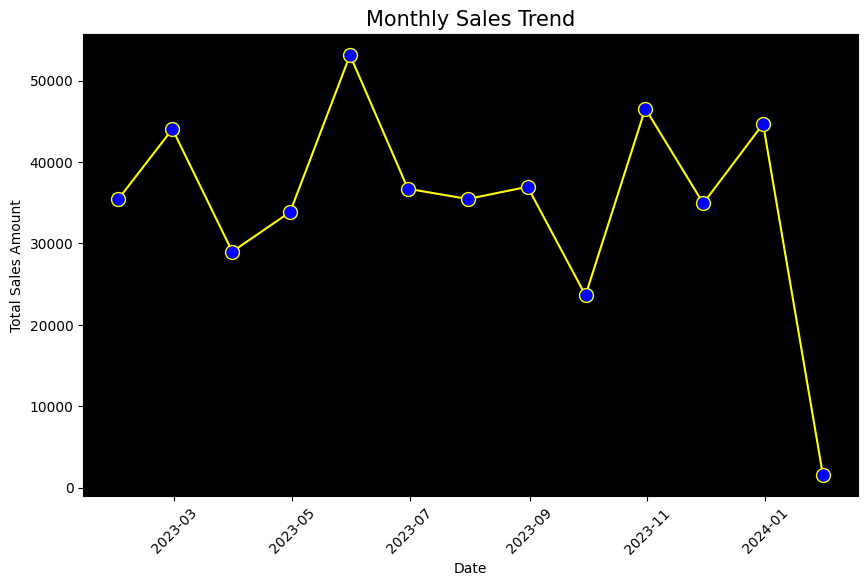

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

monthly_sales = data.resample('M', on='Date')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('black')
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='yellow',markerfacecolor='blue',markersize=10)
plt.title('Monthly Sales Trend',fontsize=15)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Total Sales Amount',fontsize=10)
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

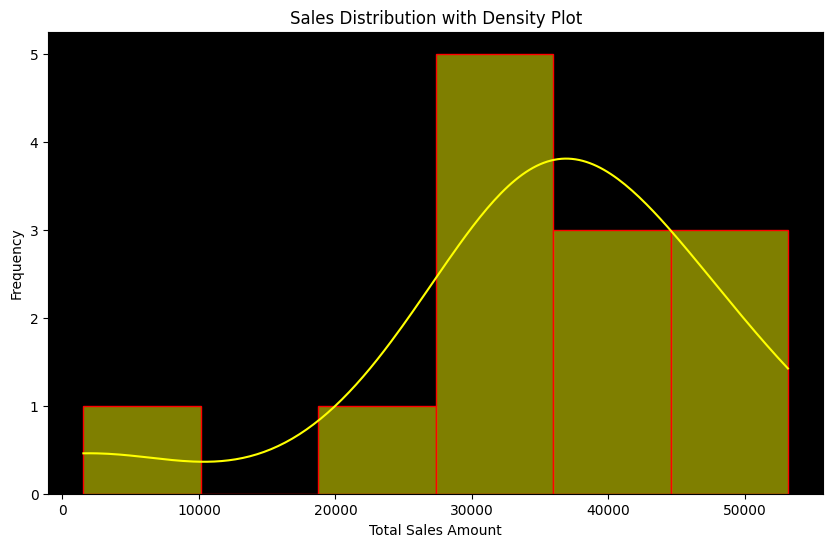

In [ ]:
plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('black')
sns.histplot(monthly_sales, kde=True, color='yellow',edgecolor='red')
plt.title('Sales Distribution with Density Plot')
plt.xlabel('Total Sales Amount')
plt.ylabel('Frequency')
plt.show()


# **Customer and Product Analysis**

<ipython-input-56-5241929ffbe0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gen_count.index, y=gen_count.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


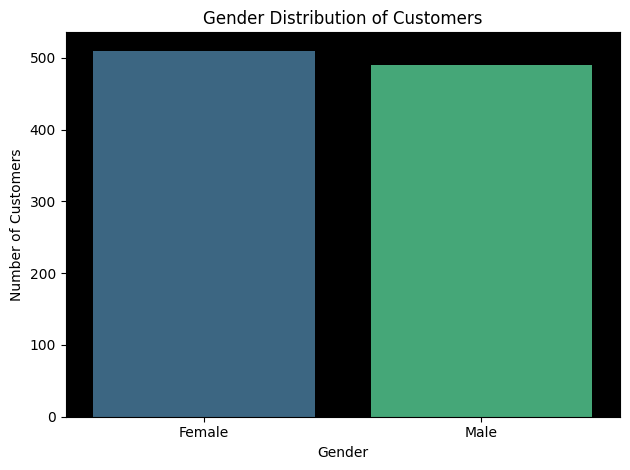

In [ ]:
gen_count = data['Gender'].value_counts()

sns.barplot(x=gen_count.index, y=gen_count.values, palette='viridis')
plt.gca().set_facecolor('black')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

<ipython-input-57-7dd62dbaaac2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gen_spend.index, y=gen_spend.values, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


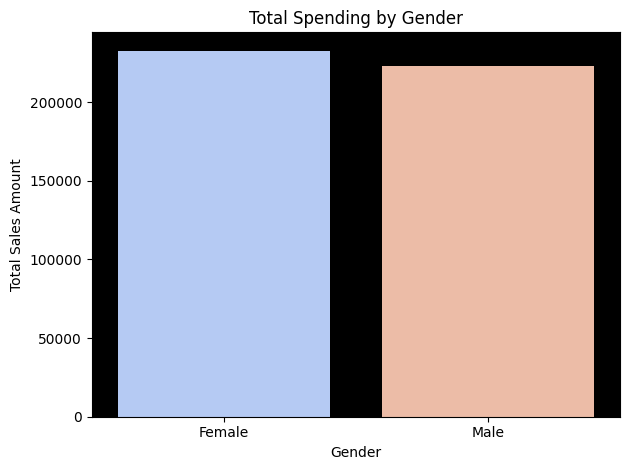

In [ ]:
gen_spend = data.groupby('Gender')['Total Amount'].sum()

sns.barplot(x=gen_spend.index, y=gen_spend.values, palette='coolwarm')
plt.gca().set_facecolor('black')
plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

<ipython-input-58-788b2efab6c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sales.index, y=cat_sales.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

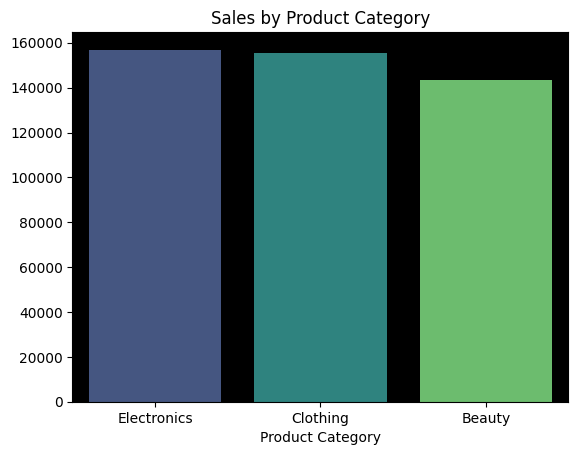

In [ ]:
cat_sales = data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

sns.barplot(x=cat_sales.index, y=cat_sales.values, palette='viridis')
plt.gca().set_facecolor('black')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt

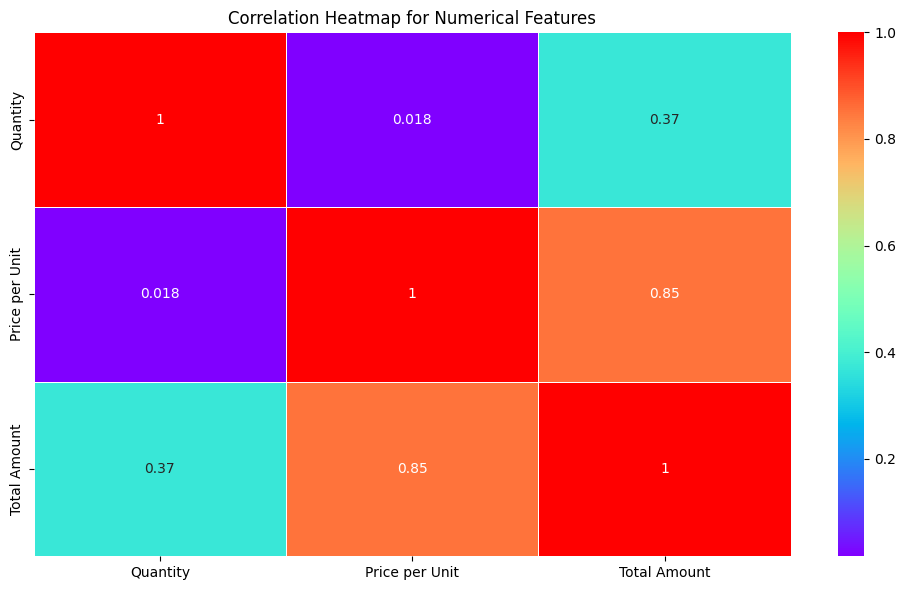

In [ ]:
numerical_columns = data[['Quantity', 'Price per Unit', 'Total Amount']]

corr_mat = numerical_columns.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True, cmap='rainbow', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.tight_layout()
plt.show()

# **Recommendations**



*   Focus marketing campaigns on the age group that spends the most. For example, if the 30-40 age group has the highest total spending, launch targeted promotions (e.g., personalized ads, discounts) toward this demographic


*   Increase stock for the most popular categories to avoid shortages, especially during high-demand periods (e.g., Festivals, special promotions)

*   If a strong correlation exists between higher unit prices and higher total amounts, introduce premium pricing strategies for high-demand or high-value products.


*   Adjust product offerings in your store to reflect demographic preferences. For example, if men spend more on electronics, ensure that the store features a prominent electronics section for male shoppers.






